<a href="https://www.kaggle.com/code/marophossain/ocular-disease-project-cse499a?scriptVersionId=142536428" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### **Enhancing Ocular Disease Diagnosis in Fundus Images with CNN Models and Deep Learning approaches**

***In this project, our main focus is to develop a system using deep learning through CNN that will use the retinal fundus image to identify, extract, and evaluate disease-specific characteristics. The system will help to early detect the diseases, which allows patients to maintain a good quality of vision while avoiding serious vision loss and blindness***

 **Important link related with this project :**

[**What are Hyperparameters ? and How to tune the Hyperparameters in a Deep Neural Network?**](https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a)

[**Tuning the Hyperparameters and Layers of Neural Network Deep Learning**](https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/)

**Project Design Report(ODD):**

[***project design report (ODD)***](https://docs.google.com/document/d/e/2PACX-1vQCh4BoFhsSPiR0M5DgF7LIAhULLipFY6b5b4xCLzf4DbMXeYRiG00njgN1eQ82Laj2F7GSF5RH7LFe/pub)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/3419_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/4176_right.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/3370_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/1255_right.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/660_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/484_right.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/4221_right.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/2396_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/543_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/3017_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/1482_left.jpg
/kaggle/input/ocular-disease-recognit

# **Importing Libraries**

In [2]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import cv2 as cv
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

# **Data Collection:**

***For this project, we have used the Ocular Disease Intelligent Recognition (ODIR) dataset.  It is one of the largest publicly available multiclass ocular disease detection datasets in the world. This dataset was compiled by Shanggong Medical Technology Co. by collecting fundus images from different hospitals in China. The fundus images in this dataset are split into eight different ocular disease classification categories.*** 

**These categories include seven disease classes:** 

* diabetes (D), 
* cataract (C), 
* glaucoma (G), 
* age-related muscular degeneration (A), 
* myopia (M), 
* hypertension (H), and 
* other abnormalities or diseases (O). 

**In total, this dataset contains 5000 cases of color fundus photographs (CFPs)**

![](https://raw.githubusercontent.com/md-marop-hossain/Ocular-Disease-Recognition-Project-CSE499A/main/distribution%20of%20images%20in%20the%20ODIR%20dataset.jpg)

In [3]:
dataset = pd.read_csv("/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv")
dataset.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [4]:
dataset.keys()

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')

### **Age distribution in DataSet**

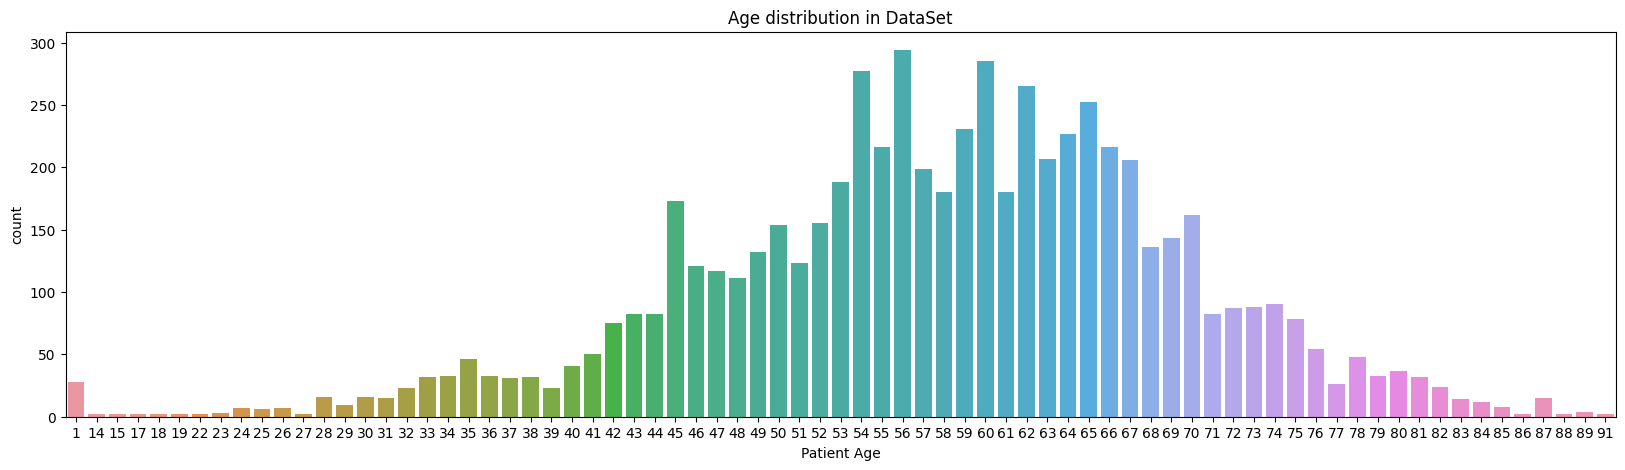

In [5]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(20,5))
sns.countplot(ax=ax1, x="Patient Age", data=dataset)
ax1.set_title("Age distribution in DataSet")
plt.show()

**NOTE:**   **we can see that the most affected are those in the age is between 45 and 70**



### **Visualize the distribution patient sex in Dataset**

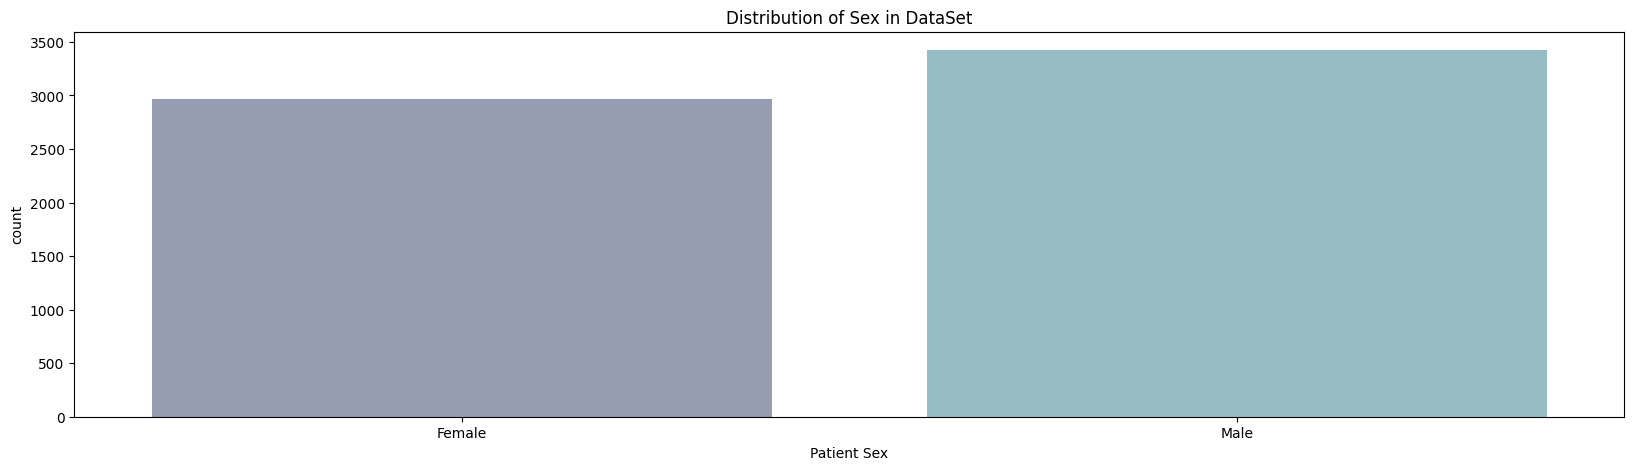

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, 1, figsize=(20, 5))
sns.countplot(ax=ax1, x='Patient Sex', data=dataset, palette=['#9299B5', '#8EC1CC'])
ax1.set_title('Distribution of Sex in DataSet')
plt.show()

**NOTE:** **we can see that the most affected are the males**



In [7]:
dataset.keys()

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')

### **Visualize the distribution of glaucoma diagnoses grouped by patient sex**

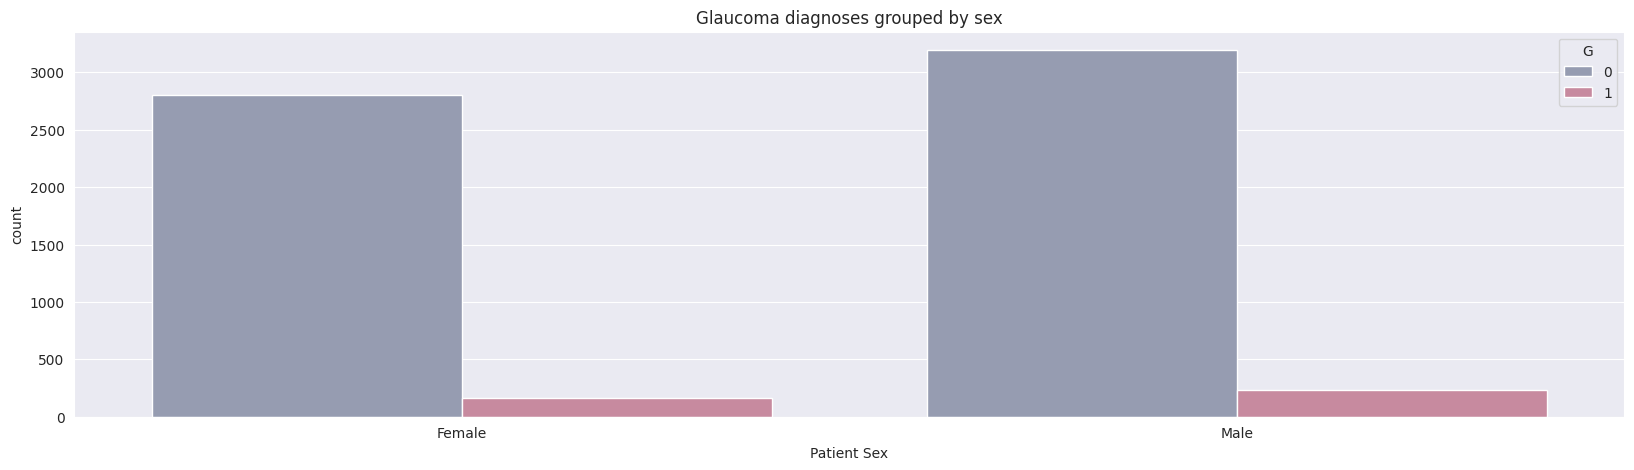

In [8]:
sns.set_style("darkgrid")
fig= plt.subplots(figsize=(20,5))
sns.countplot(x='Patient Sex', hue="G", data=dataset, palette=['#9299B5', '#D1809C'])
plt.title("Glaucoma diagnoses grouped by sex")
plt.show()

 ### **Visualize the distribution of cataract diagnoses grouped by patient sex**

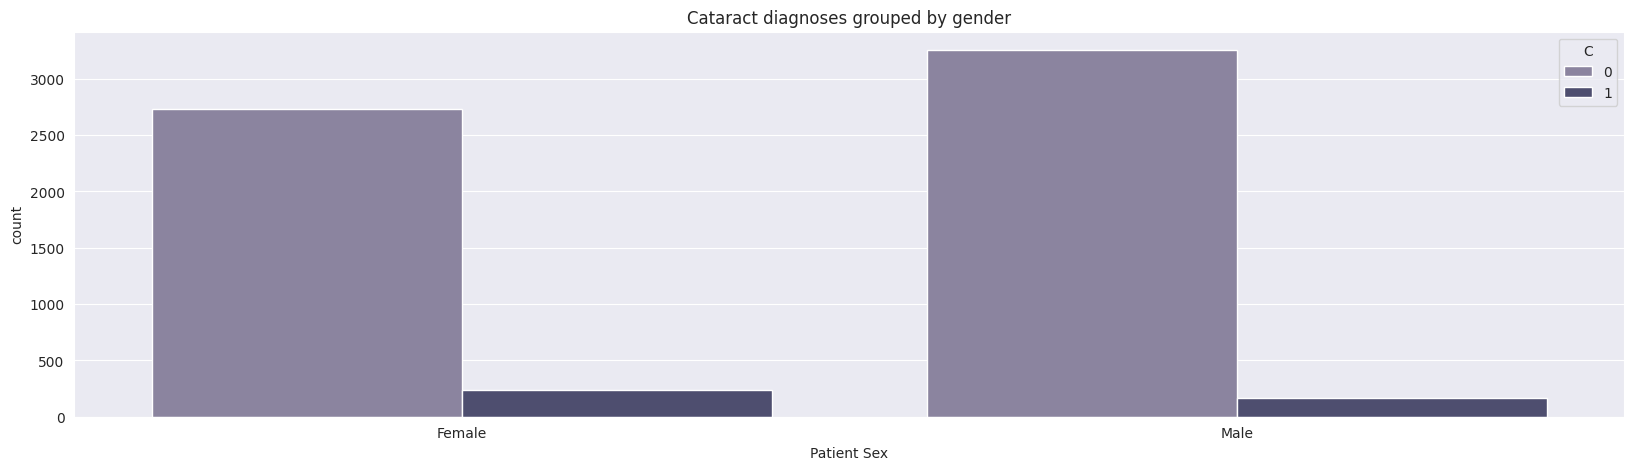

In [9]:
sns.set_style("darkgrid")
fig= plt.subplots(figsize=(20,5))
sns.countplot(x='Patient Sex', hue="C", data=dataset, palette=['#8980A3', '#494875'])
plt.title("Cataract diagnoses grouped by gender")
plt.show()

In [10]:
dataset.keys()

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')

### **Visualize the distribution of AMD diagnoses grouped by patient sex**

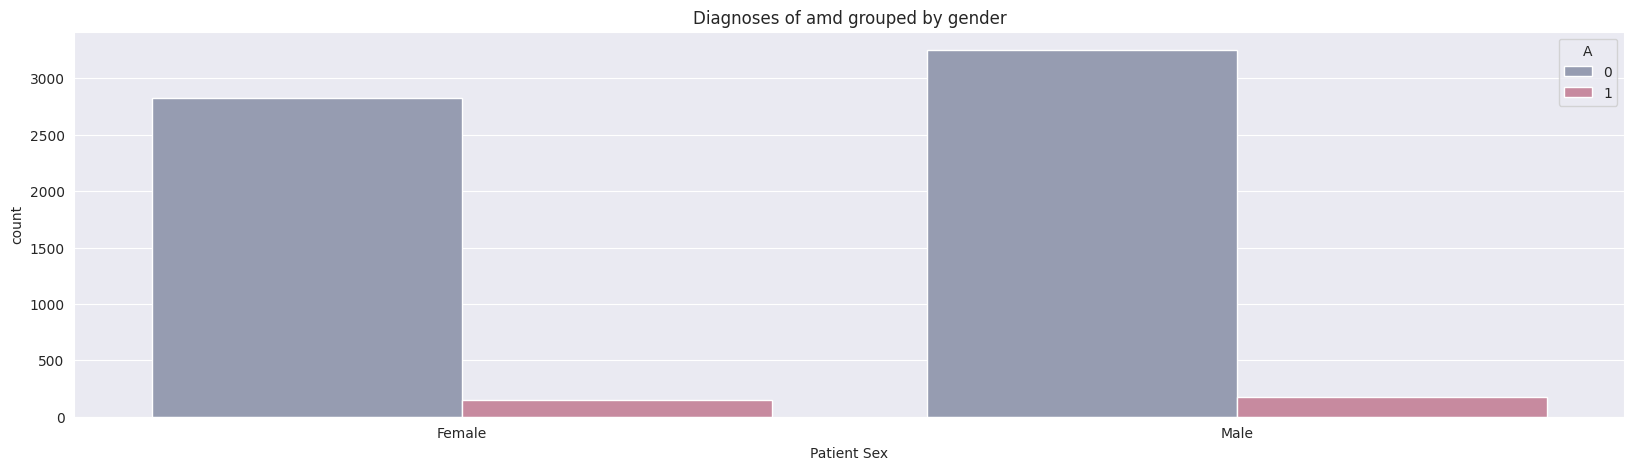

In [11]:
sns.set_style("darkgrid")
fig= plt.subplots(figsize=(20,5))
sns.countplot(x='Patient Sex',  hue="A", data=dataset, palette=['#9299B5', '#D1809C'])
plt.title("Diagnoses of amd grouped by gender")
plt.show()

### **Visualize the distribution of HyperTension diagnoses grouped by patient sex**

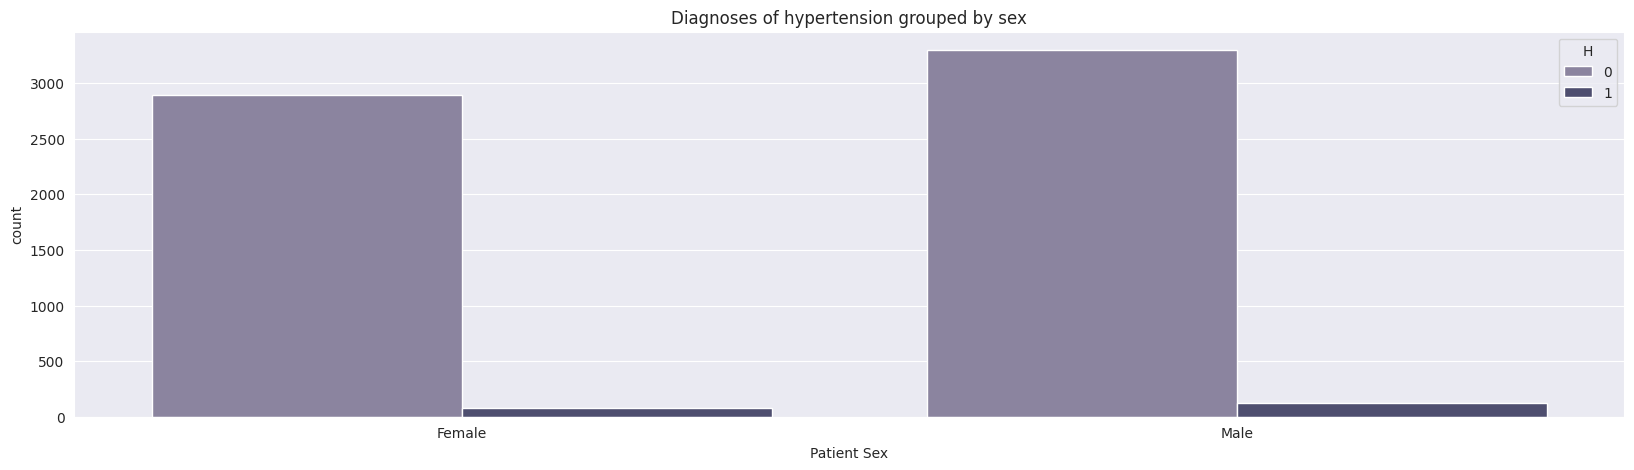

In [12]:
sns.set_style("darkgrid")
fig= plt.subplots(figsize=(20,5))
sns.countplot(x='Patient Sex', hue="H", data=dataset, palette=['#8980A3', '#494875'])
plt.title("Diagnoses of hypertension grouped by sex")
plt.show()

### **Visualize the distribution of Myopia diagnoses grouped by patient sex**

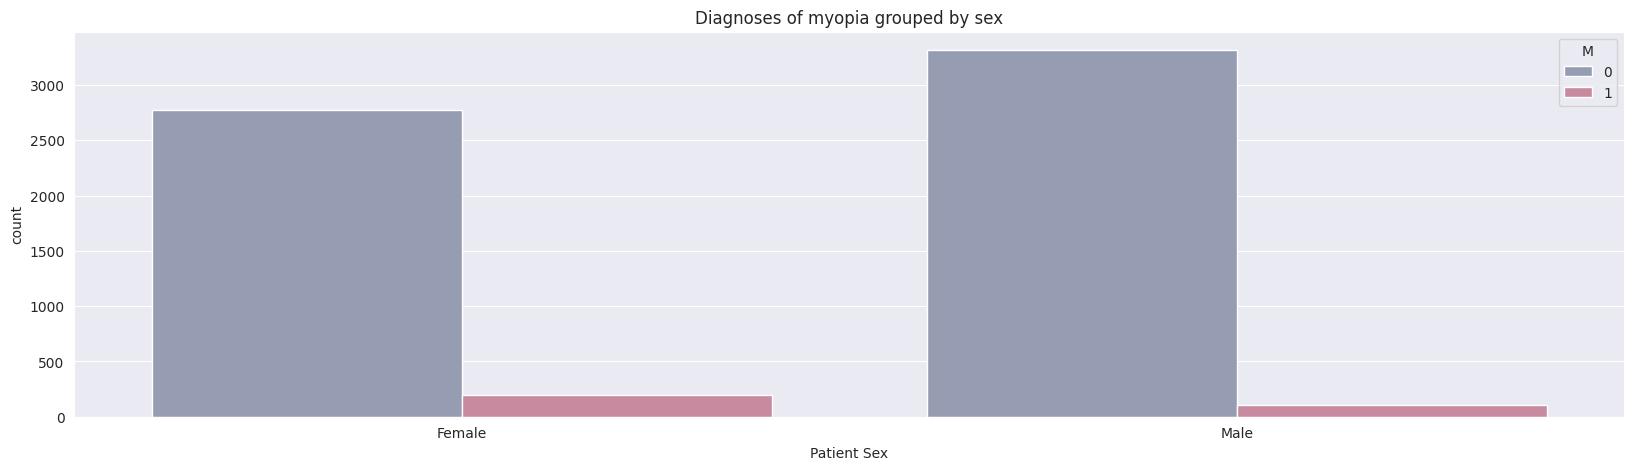

In [13]:
sns.set_style("darkgrid")
fig= plt.subplots(figsize=(20,5))
sns.countplot(x='Patient Sex', hue="M", data=dataset, palette=['#9299B5', '#D1809C'])
plt.title("Diagnoses of myopia grouped by sex")
plt.show()

#### **Visualize the distribution of Other Abnormalities diagnoses grouped by patient sex**

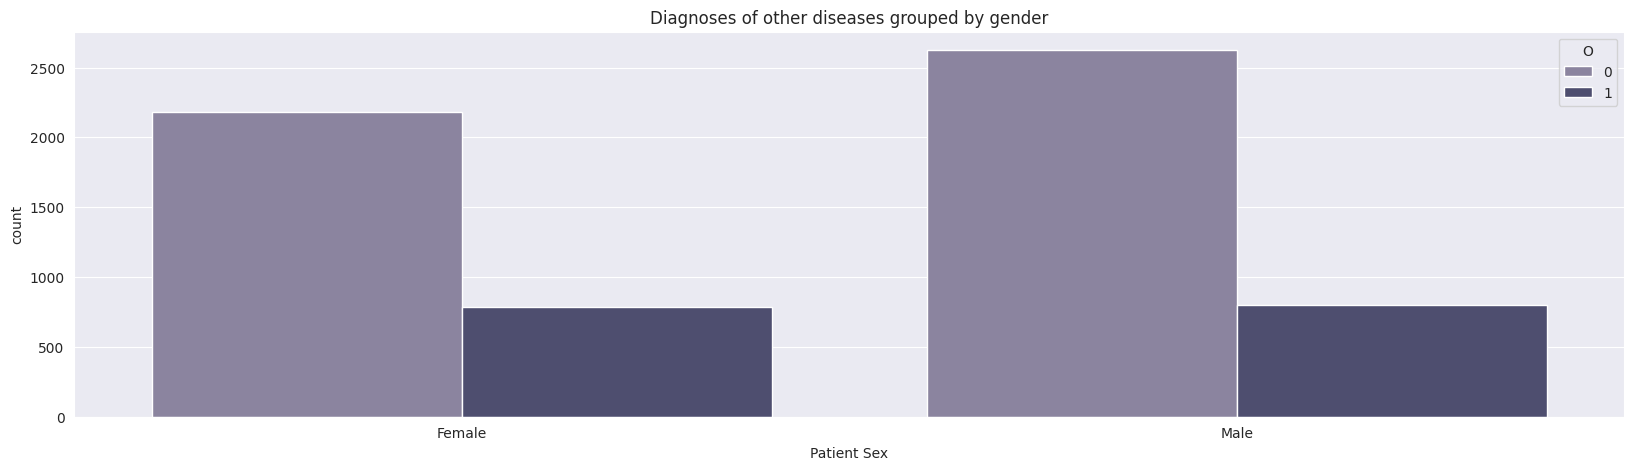

In [14]:
sns.set_style("darkgrid")
fig= plt.subplots(figsize=(20,5))
sns.countplot(x='Patient Sex', hue="O", data=dataset, palette=['#8980A3', '#494875'])
plt.title("Diagnoses of other diseases grouped by gender")
plt.show()

#### **Creating countplots (bar charts) to visualize the distribution of a categorical feature in a DataFrame**

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_count(feature, title, df, size=1, show_all=False, font='Arial Unicode MS'):
    # Specify the font for rendering text
    plt.rcParams['font.sans-serif'] = [font]
    
    # Create a figure and axis for plotting
    f, ax = plt.subplots(1, 1, figsize=(4*size, 4))
    
    # Calculate the total number of data points in the DataFrame
    total = float(len(df))
    
    if show_all:
        # Create a countplot showing all categories of the feature
        g = sns.countplot(data=df, x=feature, palette='Set3')
        g.set_title("{} distribution".format(title))
    else:
        # Create a countplot showing the top 20 categories of the feature
        g = sns.countplot(data=df, x=feature, order=df[feature].value_counts().index[:20], palette='Set3')
        
        if size > 2:
            # Rotate x-axis labels and add percentage labels to the bars
            plt.xticks(rotation=90, size=8)
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x() + p.get_width() / 2.,
                        height + 0.2,
                        '{:1.2f}%'.format(100 * height / total),
                        ha="center")
        
        g.set_title("Number and percentage of {}".format(title))
    
    # Display the plot
    plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


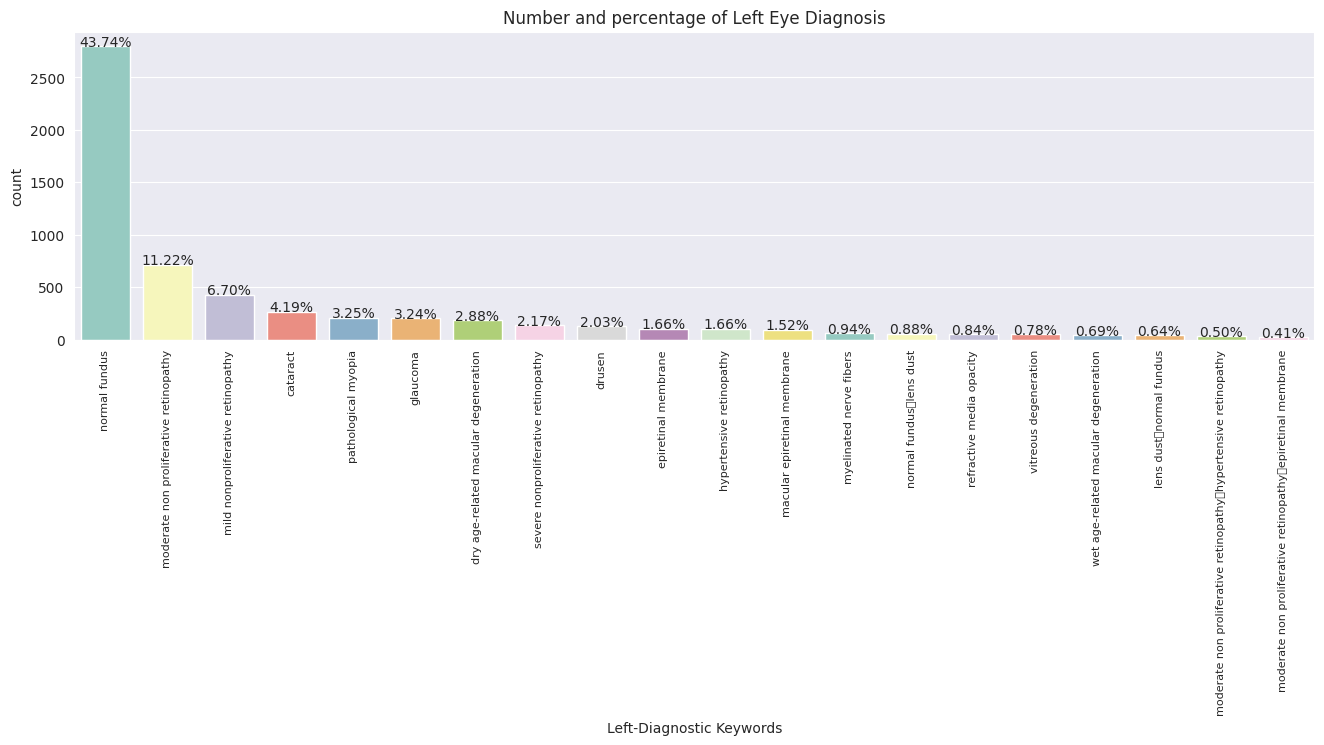

In [16]:
plot_count('Left-Diagnostic Keywords', "Left Eye Diagnosis", dataset, size=4)

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


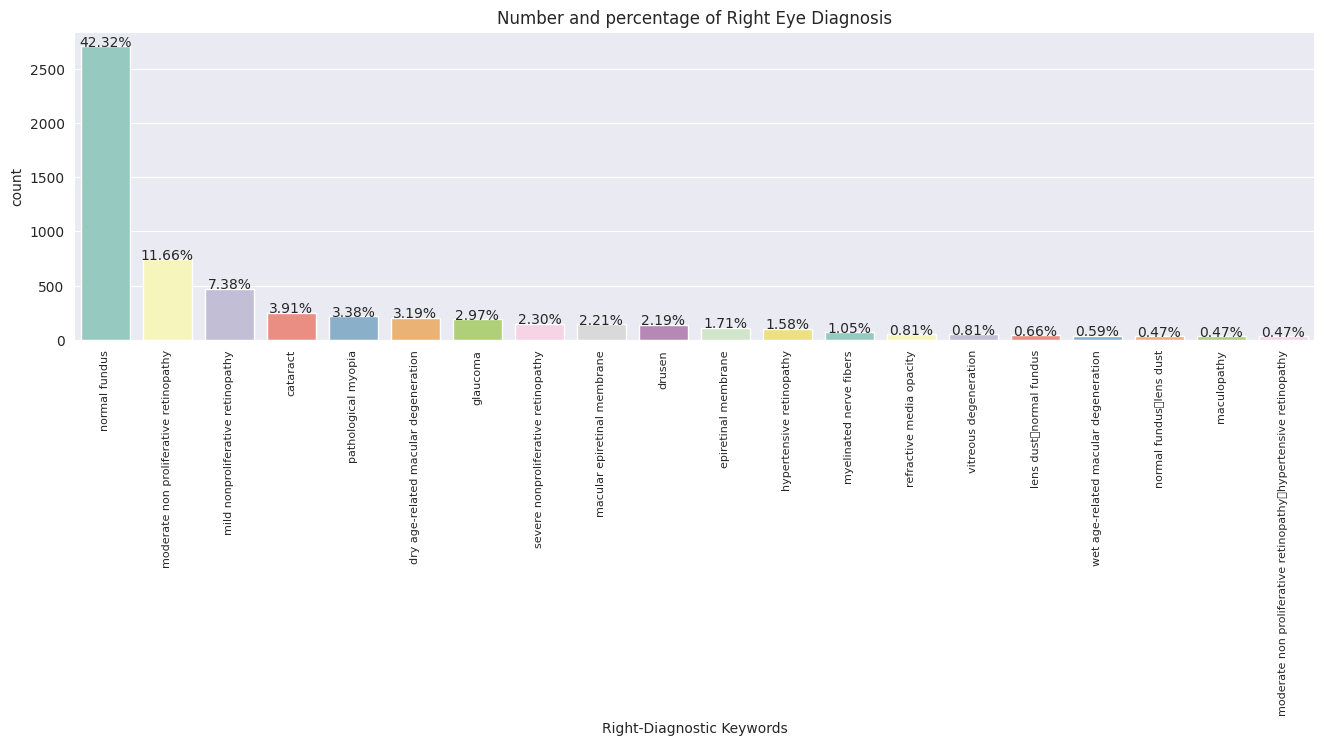

In [17]:
plot_count('Right-Diagnostic Keywords', "Right Eye Diagnosis", dataset, size=4)

# **Data Preprocessing**

In [18]:
dataset.isnull().sum()

ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
filepath                     0
labels                       0
target                       0
filename                     0
dtype: int64

***Our dataset doesn't have any null values***

**Extracting definitive diagnosis per patient...**

In [19]:
dataset['Left-Diagnostic Keywords'].unique()

array(['cataract', 'normal fundus',
       'laser spot，moderate non proliferative retinopathy',
       'macular epiretinal membrane',
       'moderate non proliferative retinopathy', 'drusen',
       'epiretinal membrane',
       'moderate non proliferative retinopathy，hypertensive retinopathy',
       'pathological myopia', 'mild nonproliferative retinopathy',
       'hypertensive retinopathy',
       'macular epiretinal membrane，mild nonproliferative retinopathy',
       'macular hole', 'wet age-related macular degeneration',
       'moderate non proliferative retinopathy，laser spot',
       'moderate non proliferative retinopathy，myelinated nerve fibers',
       'dry age-related macular degeneration',
       'epiretinal membrane，myelinated nerve fibers',
       'diabetic retinopathy', 'epiretinal membrane，lens dust', 'atrophy',
       'laser spot，white vessel，moderate non proliferative retinopathy',
       'chorioretinal atrophy',
       'moderate non proliferative retinopathy，catar

>  **In our dataset, we used 4 classes:**
- - **Normal**
- - **Glaucoma**
- - **Cataract**
- - **Diabetic Retinopathy**
     - *mild nonproliferative retinopathy*
     - *proliferative retinopathy*
     - *diabetic retinopathy*
     - *moderate non proliferative retinopathy*

### **CATARACT**

- *Identifies and extracts fundus images of patients with **CATARACTS** in either their left or right eye depending on certain conditions and diagnostic keywords in the dataset...*

> - - **Define a function *has_cataract* that checks if "cataract" is present in the diagnostic keywords**
> - - **Create new columns "left_cataract" and "right_cataract" to mark whether cataract is present in the left and right eye images**

In [20]:
#Define has_cataract function to check if a keyword contains "cataract"
def has_cataract(text):
    if "cataract" in text:
        return 2
    else:
        return 0
    
# Create new columns for left and right cataract
dataset['left_cataract'] = dataset['Left-Diagnostic Keywords'].apply(lambda x: has_cataract(x))
dataset['right_cataract'] = dataset['Right-Diagnostic Keywords'].apply(lambda x: has_cataract(x))

# Get the filenames of left and right cataract images
left_cataract = dataset.loc[(dataset.C == 1) & (dataset['left_cataract'] == 2)]['Left-Fundus'].values
right_cataract = dataset.loc[(dataset.C == 1) & (dataset['right_cataract'] == 2)]['Right-Fundus'].values

# Concatenate the left eye cataract images and right eye cataract images
cataract = np.concatenate((left_cataract, right_cataract), axis=0)

In [21]:
left_cataract[:15] #print first 15 iamg

array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg'], dtype=object)

In [22]:
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [23]:
cataract[:25]

array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg', '629_left.jpg',
       '691_left.jpg', '726_left.jpg', '750_left.jpg', '809_left.jpg',
       '820_left.jpg', '824_left.jpg', '874_left.jpg', '907_left.jpg',
       '970_left.jpg'], dtype=object)

In [24]:
len(cataract[:25])

25

In [25]:
cataract.shape

(594,)

### **NORMAL**

- *Identifies and extracts fundus images of patients with **NORMAL** in either their left or right eye depending on certain conditions and diagnostic keywords in the dataset...*

> - - **Define a function *has_normal_fundus* that checks if "normal" is present in the diagnostic keywords**
> - - **Create new columns "left_normal" and "right_normal" to mark whether cataract is present in the left and right eye images**

In [26]:
# Define a function to check for the presence of "normal fundus" in text
def has_normal_fundus(text):
    # Check if the text contains the phrase "normal fundus"
    if "normal fundus" in text:
        return 1  # Return 1 if "normal fundus" is found
    else:
        return 0  # Return 0 if "normal fundus" is not found

# Apply the has_normal_fundus function to the 'Left-Diagnostic Keywords' column and create a new 'left_normal' column
dataset['left_normal'] = dataset['Left-Diagnostic Keywords'].apply(lambda x: has_normal_fundus(x))

# Apply the has_normal_fundus function to the 'Right-Diagnostic Keywords' column and create a new 'right_normal' column
dataset['right_normal'] = dataset['Right-Diagnostic Keywords'].apply(lambda x: has_normal_fundus(x))

# Filter and extract 'Left-Fundus' values where 'N' equals 1 and 'left_normal' equals 1
left_normal = dataset.loc[(dataset.N == 1) & (dataset['left_normal'] == 1)]["Left-Fundus"].values

# Filter and extract 'Right-Fundus' values where 'N' equals 1 and 'right_normal' equals 1
right_normal = dataset.loc[(dataset.N == 1) & (dataset["right_normal"] == 1)]["Right-Fundus"].values

# Concatenate the 'left_normal' and 'right_normal' arrays to create the 'normal' array
normal = np.concatenate((left_normal, right_normal), axis=0)

In [27]:
left_normal[:10]

array(['1_left.jpg', '8_left.jpg', '84_left.jpg', '191_left.jpg',
       '394_left.jpg', '530_left.jpg', '695_left.jpg', '832_left.jpg',
       '939_left.jpg', '951_left.jpg'], dtype=object)

In [28]:
right_normal[:20]

array(['1_right.jpg', '8_right.jpg', '84_right.jpg', '191_right.jpg',
       '394_right.jpg', '530_right.jpg', '695_right.jpg', '832_right.jpg',
       '939_right.jpg', '951_right.jpg', '1034_right.jpg',
       '1054_right.jpg', '1060_right.jpg', '1072_right.jpg',
       '1253_right.jpg', '2329_right.jpg', '2330_right.jpg',
       '2331_right.jpg', '2332_right.jpg', '2333_right.jpg'], dtype=object)

In [29]:
normal[:25]

array(['1_left.jpg', '8_left.jpg', '84_left.jpg', '191_left.jpg',
       '394_left.jpg', '530_left.jpg', '695_left.jpg', '832_left.jpg',
       '939_left.jpg', '951_left.jpg', '1034_left.jpg', '1054_left.jpg',
       '1060_left.jpg', '1072_left.jpg', '1253_left.jpg', '2329_left.jpg',
       '2330_left.jpg', '2331_left.jpg', '2332_left.jpg', '2333_left.jpg',
       '2334_left.jpg', '2335_left.jpg', '2336_left.jpg', '2337_left.jpg',
       '2338_left.jpg'], dtype=object)

In [30]:
normal.shape

(4201,)

### DIABETES RETINOPATHY

- *Identifies and extracts fundus images of patients with **DIABETES RETINOPATHY** in either their left or right eye depending on certain conditions and diagnostic keywords in the dataset...*

*Indentify cases of ***Diabetic Retinopathy*** based on certain keywords in the diagnostic descriptions, and collect the corresponding fundus images for further analysis or processing...*

     -- mild nonproliferative retinopathy
     -- proliferative retinopathy
     -- diabetic retinopathy
     -- moderate non proliferative retinopathy


> - - **Define a function *has_retinopathy* that checks if "diabetic" is present in the diagnostic keywords**
> - - **Create new columns "left_diabetic" and "right_diabetic" to mark whether cataract is present in the left and right eye images**

In [31]:
# Define a function to check for retinopathy keywords in text
def has_retinopathy(text):
    # Check if any of the retinopathy keywords are present in the text
    if ('mild nonproliferative retinopathy' in text) or ('proliferative retinopathy' in text) or ('diabetic retinopathy' in text) or ('moderate non proliferative retinopathy' in text):
        return 3  # Return 3 if retinopathy is present
    else:
        return 0  # Return 0 if retinopathy is not present

# Apply the has_retinopathy function to create new columns in the dataset
dataset['left_diabetes'] = dataset['Left-Diagnostic Keywords'].apply(lambda x: has_retinopathy(x))
dataset['right_diabetes'] = dataset['Right-Diagnostic Keywords'].apply(lambda x: has_retinopathy(x))

# Filter and extract left and right fundus images for cases with retinopathy (D=1)
left_diabetes = dataset.loc[(dataset.D == 1) & (dataset['left_diabetes'] == 3)]['Left-Fundus'].values
right_diabetes = dataset.loc[(dataset.D == 1) & (dataset['right_diabetes'] == 3)]['Right-Fundus'].values

# Concatenate left and right fundus images into a single array
diabetes = np.concatenate((left_diabetes, right_diabetes), axis=0)

In [32]:
left_diabetes[:15]

array(['2_left.jpg', '5_left.jpg', '11_left.jpg', '19_left.jpg',
       '26_left.jpg', '37_left.jpg', '44_left.jpg', '46_left.jpg',
       '47_left.jpg', '49_left.jpg', '50_left.jpg', '64_left.jpg',
       '67_left.jpg', '71_left.jpg', '72_left.jpg'], dtype=object)

In [33]:
len(left_diabetes)

1673

In [34]:
right_diabetes[:16]

array(['2_right.jpg', '4_right.jpg', '5_right.jpg', '6_right.jpg',
       '7_right.jpg', '11_right.jpg', '19_right.jpg', '26_right.jpg',
       '27_right.jpg', '44_right.jpg', '50_right.jpg', '54_right.jpg',
       '64_right.jpg', '67_right.jpg', '71_right.jpg', '79_right.jpg'],
      dtype=object)

In [35]:
len(right_diabetes)

1738

In [36]:
diabetes[:20]

array(['2_left.jpg', '5_left.jpg', '11_left.jpg', '19_left.jpg',
       '26_left.jpg', '37_left.jpg', '44_left.jpg', '46_left.jpg',
       '47_left.jpg', '49_left.jpg', '50_left.jpg', '64_left.jpg',
       '67_left.jpg', '71_left.jpg', '72_left.jpg', '74_left.jpg',
       '77_left.jpg', '81_left.jpg', '86_left.jpg', '87_left.jpg'],
      dtype=object)

In [37]:
len(diabetes)

3411

In [38]:
diabetes[2120:2126]

array(['4095_right.jpg', '4096_right.jpg', '4097_right.jpg',
       '4098_right.jpg', '4099_right.jpg', '4100_right.jpg'], dtype=object)

In [39]:
diabetes[2126:2200]

array(['4102_right.jpg', '4104_right.jpg', '4105_right.jpg',
       '4106_right.jpg', '4107_right.jpg', '4109_right.jpg',
       '4110_right.jpg', '4111_right.jpg', '4112_right.jpg',
       '4113_right.jpg', '4116_right.jpg', '4117_right.jpg',
       '4118_right.jpg', '4119_right.jpg', '4120_right.jpg',
       '4121_right.jpg', '4122_right.jpg', '4125_right.jpg',
       '4126_right.jpg', '4127_right.jpg', '4129_right.jpg',
       '4130_right.jpg', '4131_right.jpg', '4133_right.jpg',
       '4134_right.jpg', '4136_right.jpg', '4137_right.jpg',
       '4138_right.jpg', '4140_right.jpg', '4141_right.jpg',
       '4142_right.jpg', '4144_right.jpg', '4146_right.jpg',
       '4147_right.jpg', '4148_right.jpg', '4151_right.jpg',
       '4152_right.jpg', '4153_right.jpg', '4154_right.jpg',
       '4155_right.jpg', '4158_right.jpg', '4160_right.jpg',
       '4161_right.jpg', '4162_right.jpg', '4164_right.jpg',
       '4166_right.jpg', '4167_right.jpg', '4168_right.jpg',
       '4169_right.jpg',

### **GLAUCOMA**

- *Identifies and extracts fundus images of patients with **GLAUCOMA** in either their left or right eye depending on certain conditions and diagnostic keywords in the dataset...*

> - - **Define a function *has_glaucoma* that checks if "Glaucoma" is present in the diagnostic keywords**
> - - **Create new columns "left_glaucoma" and "right_glaucoma" to mark whether cataract is present in the left and right eye images**

In [40]:
# Define a function to check for the presence of 'glaucoma' in text
def has_glaucoma(text):
    if 'glaucoma' in text:
        return 4  # Return 4 if 'glaucoma' is found, 0 otherwise
    else:
        return 0

# Apply the 'has_glaucoma' function to the 'Left-Diagnostic Keywords' column and create a new 'left_glaucoma' column
dataset['left_glaucoma'] = dataset['Left-Diagnostic Keywords'].apply(lambda x: has_glaucoma(x))

# Apply the 'has_glaucoma' function to the 'Right-Diagnostic Keywords' column and create a new 'right_glaucoma' column
dataset['right_glaucoma'] = dataset['Right-Diagnostic Keywords'].apply(lambda x: has_glaucoma(x))

# Filter the dataset to select rows where 'G' (assuming it represents a diagnosis or condition) is equal to 1
# and where 'left_glaucoma' is equal to 4, and extract 'Left-Fundus' values into 'left_glaucoma' array
left_glaucoma = dataset.loc[(dataset.G == 1) & (dataset['left_glaucoma'] == 4)]['Left-Fundus'].values

# Filter the dataset to select rows where 'G' is equal to 1 and where 'right_glaucoma' is equal to 4,
# and extract 'Right-Fundus' values into 'right_glaucoma' array
right_glaucoma = dataset.loc[(dataset.G == 1) & (dataset['right_glaucoma'] == 4)]['Right-Fundus'].values

# Concatenate 'left_glaucoma' and 'right_glaucoma' arrays to create a single 'glaucoma' array
glaucoma = np.concatenate((left_glaucoma, right_glaucoma), axis=0)

In [41]:
left_glaucoma[:10]

array(['95_left.jpg', '153_left.jpg', '167_left.jpg', '178_left.jpg',
       '247_left.jpg', '365_left.jpg', '583_left.jpg', '625_left.jpg',
       '746_left.jpg', '931_left.jpg'], dtype=object)

In [42]:
print("Length of left eye glaucoma : ", len(left_glaucoma))

Length of left eye glaucoma :  332


In [43]:
right_glaucoma[:15]

array(['43_right.jpg', '167_right.jpg', '238_right.jpg', '247_right.jpg',
       '365_right.jpg', '583_right.jpg', '746_right.jpg', '931_right.jpg',
       '1209_right.jpg', '1210_right.jpg', '1211_right.jpg',
       '1212_right.jpg', '1213_right.jpg', '1214_right.jpg',
       '1215_right.jpg'], dtype=object)

In [44]:
print("Length of right eye glaucoma : ", len(right_glaucoma))

Length of right eye glaucoma :  284


In [45]:
#After concatenation left eye glaucoma image and right eye glaucoma image
print("Length of Glaucoma : ", len(glaucoma))

Length of Glaucoma :  616


In [46]:
print("Shape of Glaucoma: ", glaucoma.shape)

Shape of Glaucoma:  (616,)


In [47]:
print("Total Cataract Images [left and right eyes]: ", len(cataract))
print("Total Normal Images [left and right eyes]: ", len(normal))
print("Total Glaucoma Images [left and right eyes]: ", len(glaucoma))
print("Total Diabete Images [left and right eyes] : ", len(diabetes))

Total Cataract Images [left and right eyes]:  594
Total Normal Images [left and right eyes]:  4201
Total Glaucoma Images [left and right eyes]:  616
Total Diabete Images [left and right eyes] :  3411


### **Creating a Dataset from Preprocessed Images for Ocular Disease Recognition**

*Firstly, we defines a function to **create a dataset from a directory of preprocessed images** for the purpose of **training and testing** a deep learning model for ocular disease recognition...*

In [48]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

# Define the dataset directory and image size
dataset_dir = "/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images"
image_size = 224

# Create an empty list for storing image data and labels
labels = []
dataset = []

#Function to create the dataset
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        
        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

### **Create Cataract Dataset**

In [49]:
#create the cataract dataset and level is 1
dataset = create_dataset(cataract, 1)

 23%|██▎       | 139/594 [00:01<00:03, 114.32it/s][ WARN:0@44.453] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/2244_left.jpg'): can't open/read file: check file path/integrity
[ WARN:0@44.480] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/2251_left.jpg'): can't open/read file: check file path/integrity
100%|██████████| 594/594 [00:04<00:00, 133.25it/s]


In [50]:
len(dataset)

588

### **Create Normal Dataset**

In [51]:
#create the normal dataset and level is 0
dataset = create_dataset(normal, 0)

  4%|▍         | 160/4201 [00:02<00:52, 77.20it/s][ WARN:0@50.122] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/2495_left.jpg'): can't open/read file: check file path/integrity
[ WARN:0@50.124] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/2496_left.jpg'): can't open/read file: check file path/integrity
  9%|▉         | 393/4201 [00:07<01:47, 35.47it/s][ WARN:0@55.463] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/2751_left.jpg'): can't open/read file: check file path/integrity
[ WARN:0@55.464] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/2752_left.jpg'): can't open/read file: check file path/integrity
 16%|█▌        | 662/4201 [00:12<00:55, 64.14it/s][ WARN:0@60.866] global loadsave.cpp:248 findDecoder imread_('/kaggle/

In [52]:
len(dataset)

4731

### **Create Diabetes Dataset**

In [53]:
#create the diabetes dataset and level is 2
dataset = create_dataset(diabetes, 2)

  1%|          | 18/3411 [00:00<01:04, 52.51it/s][ WARN:0@93.436] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/90_left.jpg'): can't open/read file: check file path/integrity
[ WARN:0@93.466] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/108_left.jpg'): can't open/read file: check file path/integrity
  1%|          | 36/3411 [00:00<01:18, 43.15it/s][ WARN:0@93.881] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/188_left.jpg'): can't open/read file: check file path/integrity
[ WARN:0@93.882] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/195_left.jpg'): can't open/read file: check file path/integrity
[ WARN:0@93.885] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_imag

In [54]:
len(dataset)

8100

### **Create Glaucoma Dataset**

In [55]:
#create the glaucoma dataset and level is 3
dataset = create_dataset(glaucoma, 3)

100%|██████████| 616/616 [00:07<00:00, 82.22it/s] 


In [56]:
len(dataset)

8713

In [57]:
print("Shape of the dataset : ", dataset[0][0].shape)

Shape of the dataset :  (224, 224, 3)


***224x224 image size and 3 means RGB colors,red, green and blue***

### **Random Sampling of Fundus Images with Labels**

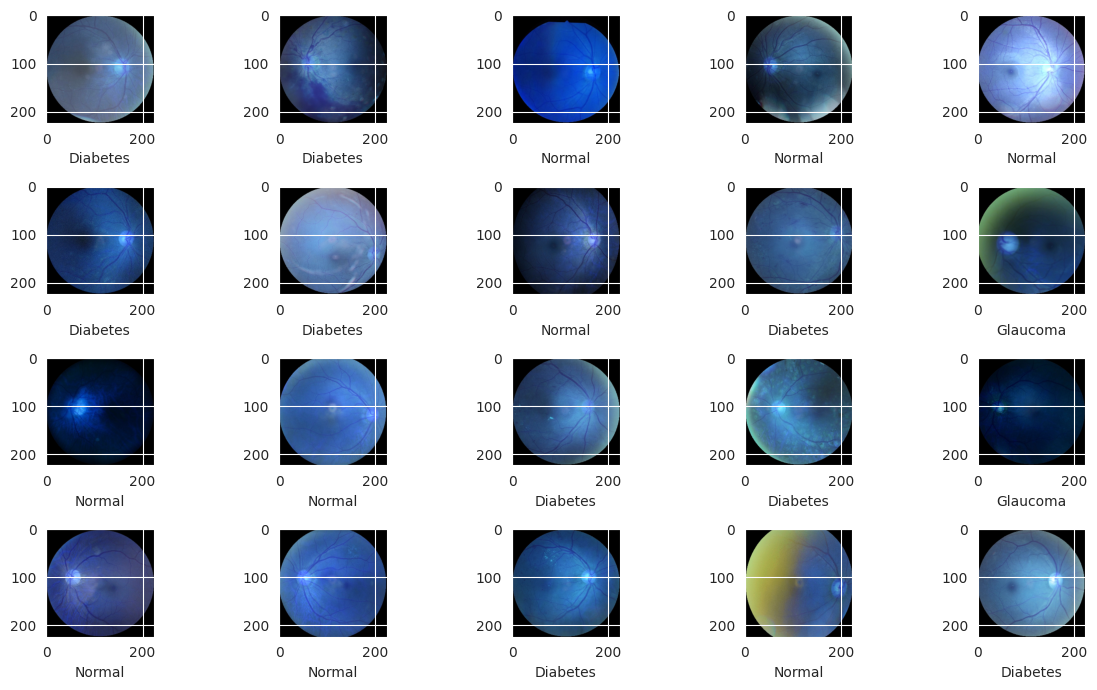

In [58]:
plt.figure(figsize=(12,7))
for i in range(20):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    label = dataset[sample][1]
    if label == 0:
      label = "Normal"
    elif label == 1:
      label = "Cataract"
    elif label == 2:
      label = "Diabetes"
    elif label == 3:
      label = "Glaucoma"
    plt.subplot(4,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()